In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

In [3]:
train = pd.read_csv("train.csv")
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [5]:
test = pd.read_csv("test.csv")
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


### Data Cleaning

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [10]:
train.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [12]:
#Check for duplicates
duplicate_rows = train[train.duplicated()]
print("Number of train duplicate rows:", len(duplicate_rows))

duplicate_rows = test[test.duplicated()]
print("Number of test duplicate rows:", len(duplicate_rows))

Number of train duplicate rows: 0
Number of test duplicate rows: 0


In [14]:
train.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [16]:
test.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage'],
      dtype='object')

In [18]:
train.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


### Data Visualization

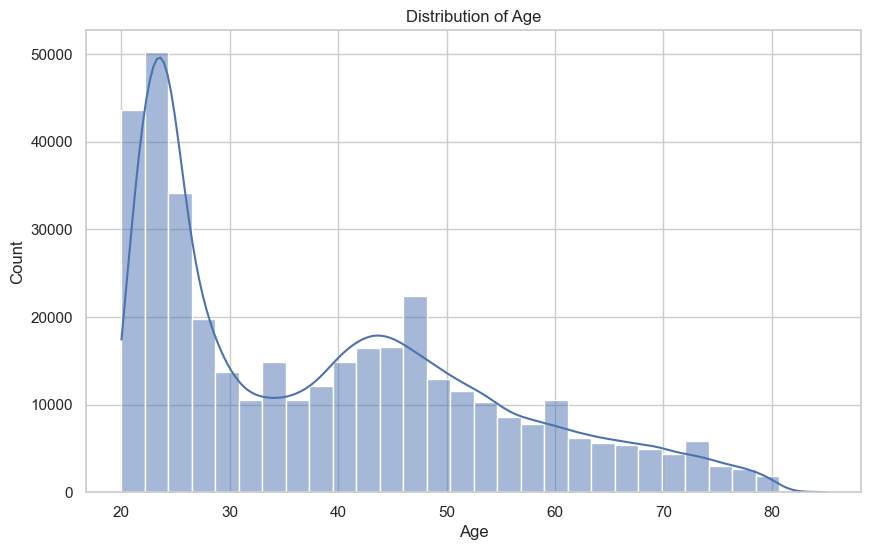

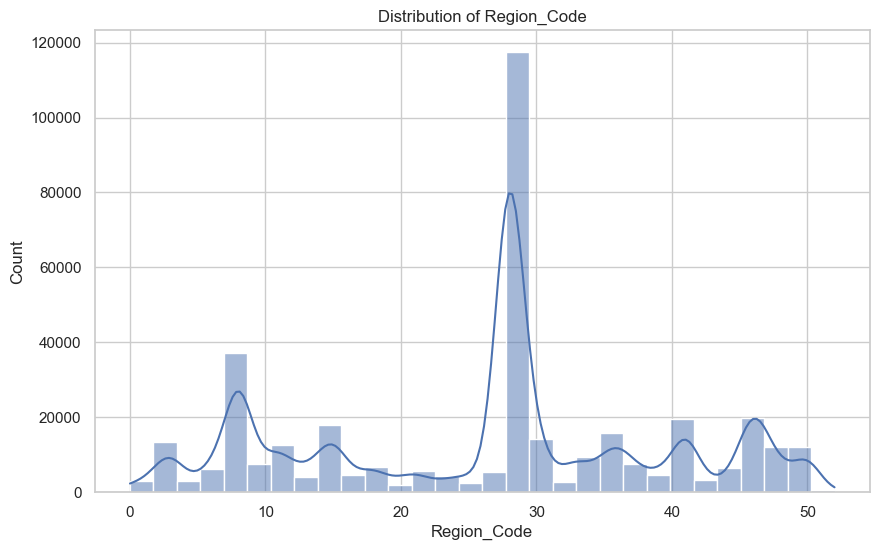

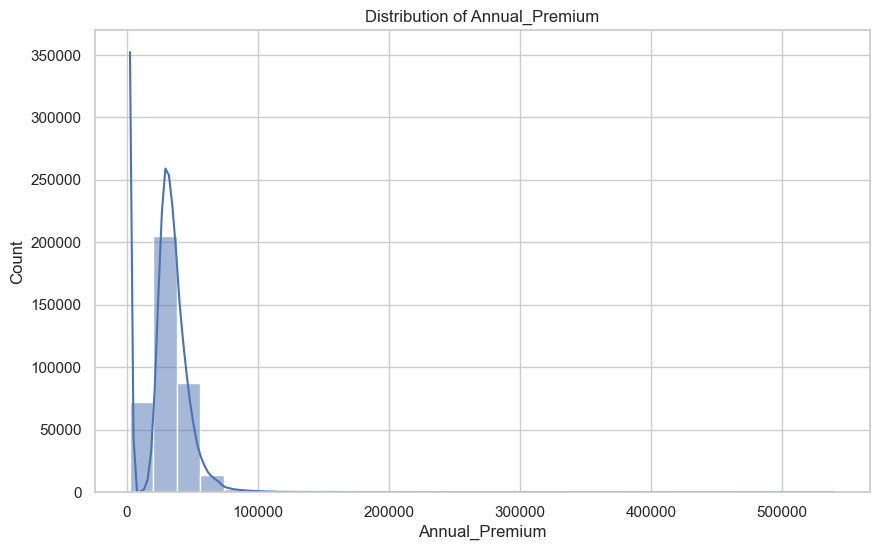

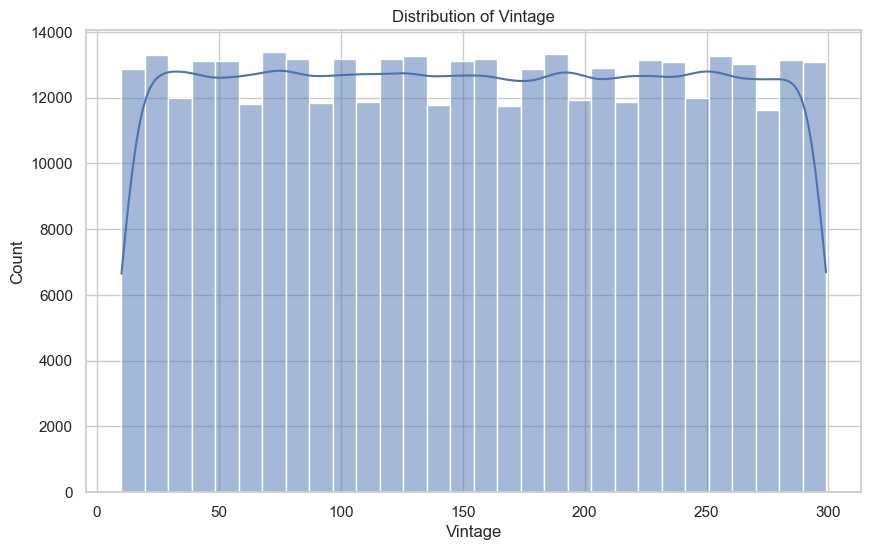

In [21]:
# Set plot style
sns.set(style="whitegrid")

# Plot the distribution of numerical features
numerical_features = ['Age', 'Region_Code', 'Annual_Premium', 'Vintage']
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(train[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

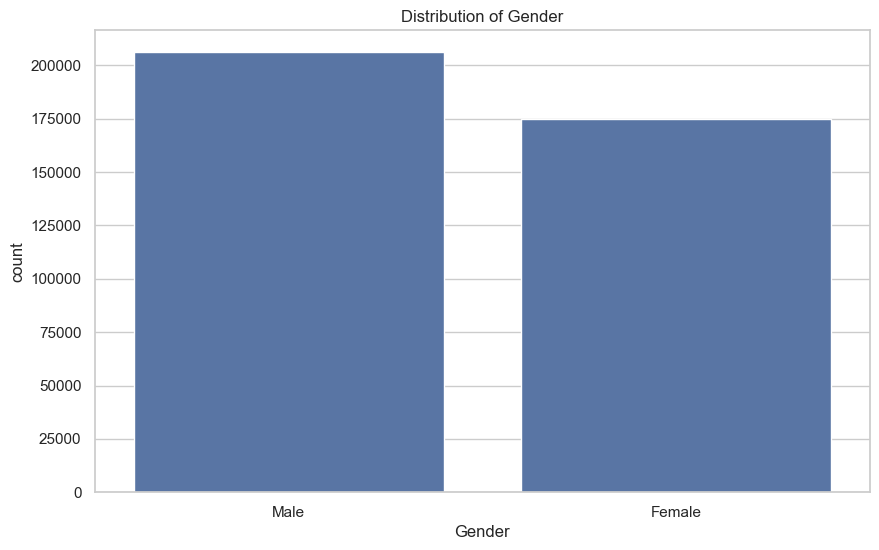

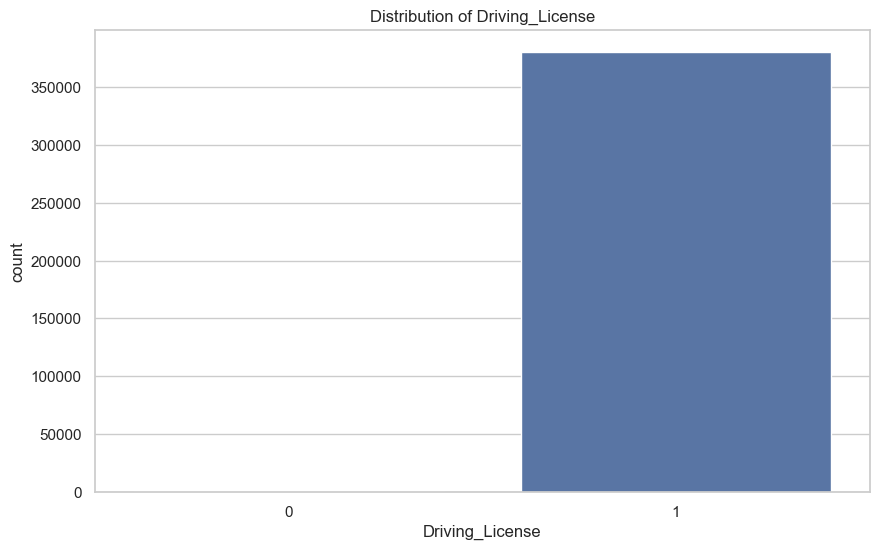

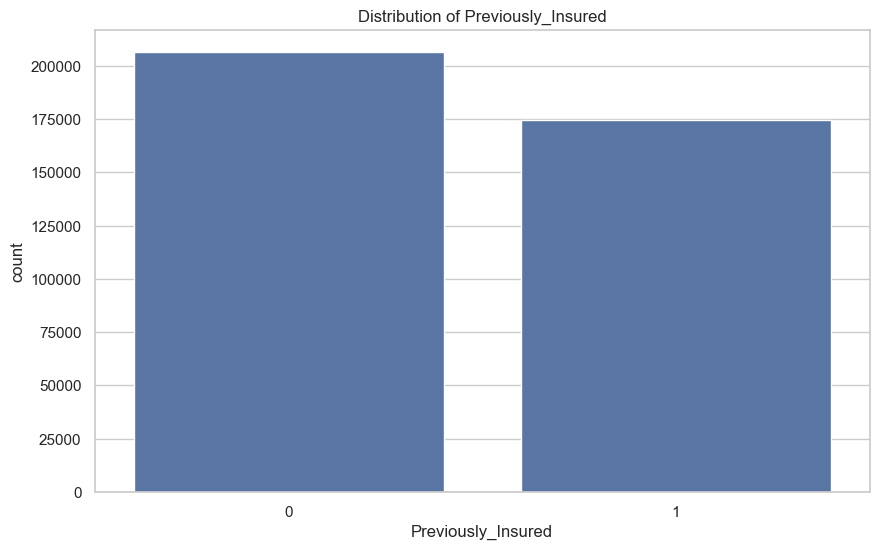

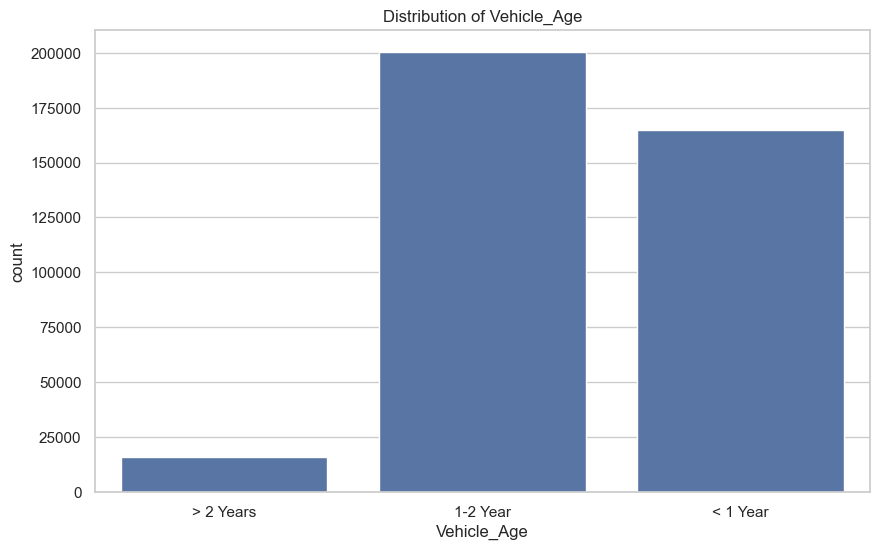

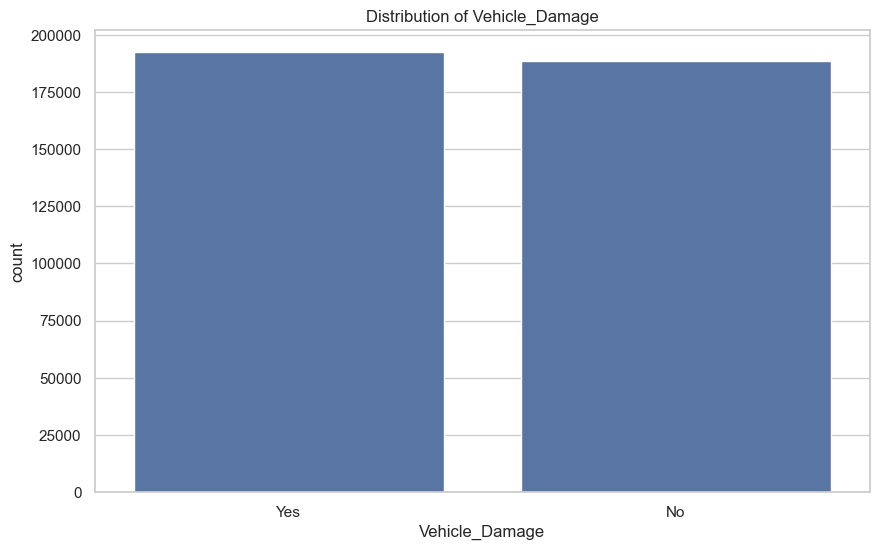

In [23]:
# Plot the distribution of categorical features
categorical_features = ['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage']
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, data=train)
    plt.title(f'Distribution of {feature}')
    plt.show()

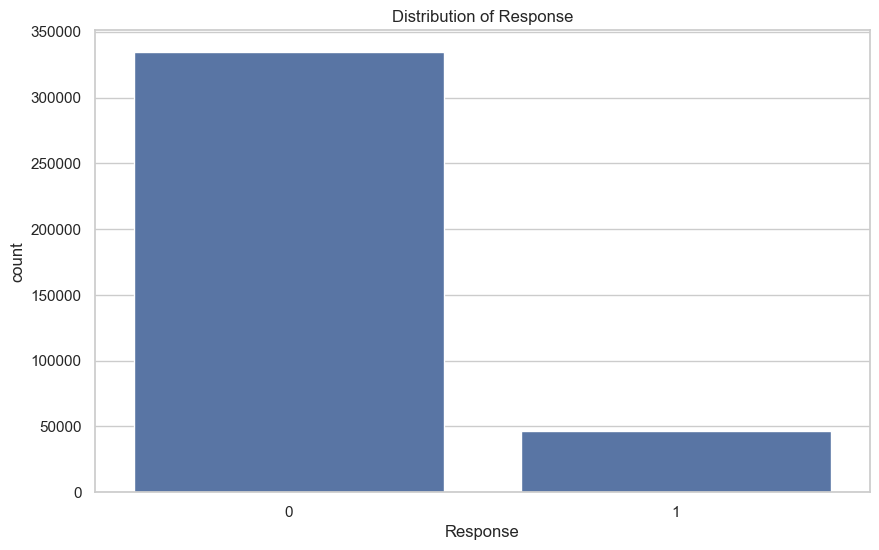

In [25]:
# Plot the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.countplot(x='Response', data=train)
plt.title('Distribution of Response')
plt.show()

### Label Encoding

In [28]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoder = LabelEncoder()
for col in ['Gender', 'Vehicle_Age', 'Vehicle_Damage']:
    train[col] = label_encoder.fit_transform(train[col])
    test[col] = label_encoder.transform(test[col])
train.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,0,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,1,0,27496.0,152.0,39,0


### Standardizing the data

In [31]:
from sklearn.preprocessing import StandardScaler

# Define numerical features
numerical_features = ['Age', 'Region_Code', 'Annual_Premium', 'Vintage']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
train[numerical_features] = scaler.fit_transform(train[numerical_features])

# Transform the test data
test[numerical_features] = scaler.transform(test[numerical_features])

In [33]:
# Features and target
X = train.drop(columns=['id', 'Response'])
y = train['Response']

# Prepare test set
X_test = test.drop(columns=['id'])

### Traning the model 

In [36]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
from sklearn.linear_model import LogisticRegression

In [46]:
model_lr = LogisticRegression(max_iter=500)
model_lr.fit(X_train, y_train)
y_val_pred_lr = model_lr.predict(X_val)

In [48]:
# Calculate accuracy
accuracy_lr = accuracy_score(y_val, y_val_pred_lr)
print(f"Logistic Regression Validation Accuracy: {accuracy_lr}")

Logistic Regression Validation Accuracy: 0.8750623179659416
